In [1]:
sc

<SparkContext master=spark://ec2-18-191-111-224.us-east-2.compute.amazonaws.com:7077 appName=PySparkShell>

In [2]:
import numpy as np
import matplotlib.pyplot as plt

from pyspark.sql.functions import rand, randn

In [3]:
n_samples =20000

In [4]:
# Create a DataFrame with one int column and 10 rows.
df = sqlContext.range(0, n_samples)
df.show()

+---+
| id|
+---+
|  0|
|  1|
|  2|
|  3|
|  4|
|  5|
|  6|
|  7|
|  8|
|  9|
| 10|
| 11|
| 12|
| 13|
| 14|
| 15|
| 16|
| 17|
| 18|
| 19|
+---+
only showing top 20 rows



In [5]:
df_2=df.select("id", rand(seed=10).alias("x1"), rand(seed=11).alias("x2"))
df_2.show()

+---+-------------------+-------------------+
| id|                 x1|                 x2|
+---+-------------------+-------------------+
|  0|0.41371264720975787| 0.1982919638208397|
|  1| 0.7311719281896606|0.12714181165849525|
|  2| 0.9031701155118229| 0.7604318153406678|
|  3|0.09430205113458567|   0.83487085888236|
|  4|0.38340505276222947| 0.3142596916968412|
|  5| 0.5569246135523511|0.19839495779536798|
|  6| 0.4977441406613893|0.08639627526220262|
|  7| 0.2076666106201438|0.12330216235050129|
|  8| 0.9571919406508957|0.21445382359299292|
|  9| 0.7429395461204413| 0.9855041850562863|
| 10| 0.3383362304807752| 0.8102099823499183|
| 11| 0.6701724731609291| 0.9048495847713486|
| 12| 0.6417696089901257| 0.7583887295864301|
| 13| 0.7241109765059401| 0.6136590106587135|
| 14|0.34089575652338666|0.36515543221694347|
| 15|0.24856531779931312|0.38791148232121886|
| 16| 0.5334251467105187| 0.5558990805912561|
| 17|0.06447333000037836| 0.4326458347252248|
| 18|0.19426472258759375| 0.522208

In [6]:
rdd_scaled=df_2.rdd.map(
    lambda row: (2*row['x1']-1, 2*row['x2']-1)
)
rdd_scaled.take(5)

[(-0.17257470558048427, -0.6034160723583206),
 (0.4623438563793212, -0.7457163766830095),
 (0.8063402310236458, 0.5208636306813357),
 (-0.8113958977308287, 0.66974171776472),
 (-0.23318989447554106, -0.3714806166063176)]

In [7]:
rdd_filtered = rdd_scaled.filter(lambda row: row[0]*row[0]+row[1]*row[1]<1)
rdd_rest = rdd_scaled.filter(lambda row: row[0]*row[0]+row[1]*row[1]>1)

In [8]:
num_inside=rdd_filtered.count()
print(num_inside)

15715


In [10]:
pi_estimate = 4.0*num_inside/n_samples
print('Estimated pi:', pi_estimate)

('Estimated pi:', 3.143)


In [11]:
data_filtered=rdd_filtered.collect()
data_rest = rdd_rest.collect()

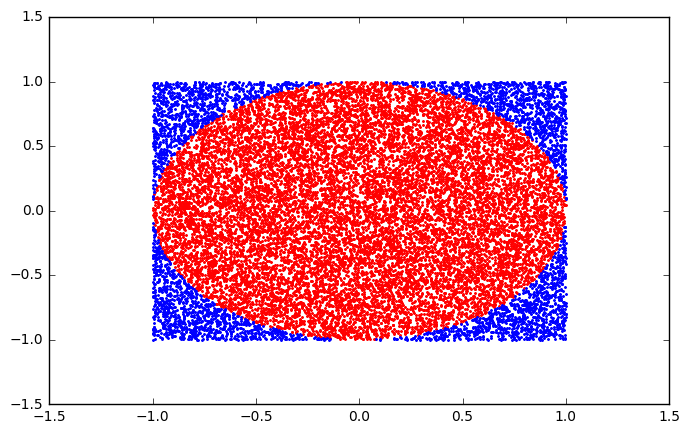

In [12]:
%matplotlib inline
plt.rcParams['figure.figsize'] = (8, 5)
fig = plt.figure()

# Plotting along with the Centroids

plt.scatter([actdata[0] for actdata in data_filtered], [actdata[1] for actdata in data_filtered], c='red',s=2, marker='x')
plt.scatter([actdata[0] for actdata in data_rest], [actdata[1] for actdata in data_rest], c='blue', s=2, marker = 'x')